# MUC5B cis comparison

MUC5B is frequently mutated in the endometrial, colon, and ovarian datasets (> %10 mutated). MUC5B codes for a protein that is a "gel-forming mucin thought to contribute to the lubricating and viscoelastic properties of whole saliva and cervical mucus" (https://www.uniprot.org/uniprot/Q9HC84). This notebook will compare cis effects for MUC5B in the ovarian dataset.

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the mutation frequency of MUC5B for Ovarian Cancer

In [2]:
ov = cptac.Ovarian()
desired_cutoff = 0.1
gene = 'MUC5B'

freq_mut = al.get_frequently_mutated(ov, cutoff = desired_cutoff)
freq_mut.loc[freq_mut['Gene'] == gene]

,Gene,Unique_Samples_Mut,Missense_Mut,Truncation_Mut
9,MUC5B,0.108434,0.108434,0.0


## Step 3: cis comparisons for omics 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. These steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.

The format_cis_comparison_data does the first 3 steps.

# Proteomics cis comparison

Proteomics: Mutated and Wildtype

In [3]:
prot_mut_status = f.format_cis_comparison_data(ov, 'proteomics', gene)

prot_col_list = [gene+'_proteomics']
prot_col = gene+"_proteomics"

# Step 4 - T-test comparing means of mutated vs wildtype effect on cis omics
print("Doing t-test comparison\n")
prot_pval_results = al.wrap_ttest(prot_mut_status, 'binary_mutations', prot_col_list)
print(prot_pval_results)

Doing t-test comparison

         Comparison  P_Value
0  MUC5B_proteomics  0.02088


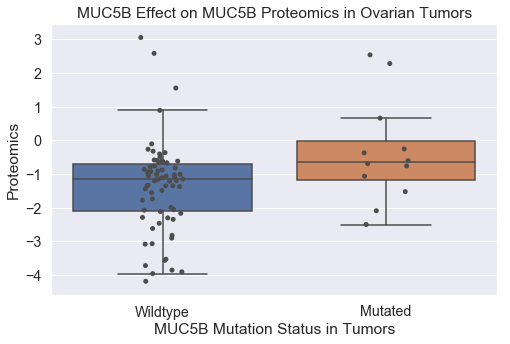

In [4]:
# Step 5 - Create boxplt to compare wildtype and mutated effect on omics data
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.3)
cis_boxplot = sns.boxplot(data = prot_mut_status, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene + " Proteomics in Ovarian Tumors")
cis_boxplot = sns.stripplot(data= prot_mut_status, x = 'binary_mutations',
                            y = prot_col,jitter = True, color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
#cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels(),rotation = 50)
plt.show()
plt.clf()
plt.close()

Proteomics: Missense and Truncation compared to wildtype

In [24]:
prot_mut_type = f.get_missense_truncation_comparison(ov, 'proteomics', gene)
prot_wildtype = prot_mut_status.loc[prot_mut_status['binary_mutations'] == 'Wildtype'] # select all wildtype from binary_mutations
prot_mut_and_wildtype = prot_mut_type.append(prot_wildtype, sort=False) # use for graph

# compare missense and wildtype
prot_miss_wt = prot_mut_and_wildtype.loc[prot_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
prot_results_miss = al.wrap_ttest(prot_miss_wt, 'binary_mutations', prot_col_list)
print(prot_results_miss)

# no truncation mutations

Only missence type mutations found for MUC5B. Not possible to compare mutation types.
Doing t-test comparison for missense and wildtype

         Comparison   P_Value
0  MUC5B_proteomics  0.020591


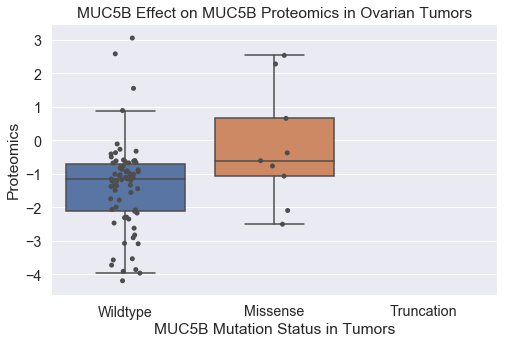

In [6]:
prot_cis_boxplot = sns.boxplot(data = prot_mut_and_wildtype, x = 'binary_mutations',
                          y = prot_col, order = ["Wildtype","Missense","Truncation"], showfliers = False)  
prot_cis_boxplot.set_title(gene + " Effect on "+gene+" Proteomics in Ovarian Tumors")
prot_cis_boxplot = sns.stripplot(data= prot_mut_and_wildtype, x = 'binary_mutations',
                            y = prot_col, jitter = True, color = ".3", order = ["Wildtype","Missense","Truncation"])
prot_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()
plt.clf()
plt.close()

# Transcriptomics cis comparison

Transcriptomics: Mutated and Wildtype

In [7]:
trans_mut_status = f.format_cis_comparison_data(ov, 'transcriptomics', gene)

trans_col_list = [gene+'_transcriptomics']

print("Doing t-test comparison for mutation status\n")
trans_pval_results = al.wrap_ttest(trans_mut_status, 'binary_mutations', trans_col_list)
print(trans_pval_results)

Doing t-test comparison for mutation status

No significant comparisons.
None


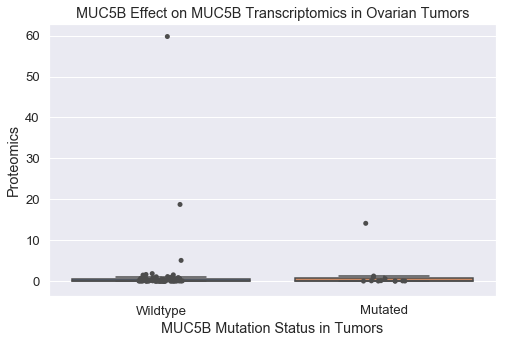

In [8]:
trans_col = gene+'_transcriptomics'

plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.2)
cis_boxplot = sns.boxplot(data = trans_mut_status, x = 'binary_mutations',
                          y = trans_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene +" Transcriptomics in Ovarian Tumors")
cis_boxplot = sns.stripplot(data = trans_mut_status, x = 'binary_mutations',y = trans_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()
plt.clf()
plt.close()

Transcriptomics: Missense and Truncation

In [25]:
# select all wildtype from earlier -add to mut_type binary column
trans_wildtype = trans_mut_status.loc[trans_mut_status['binary_mutations'] == 'Wildtype'] 
trans_mut_type = f.get_missense_truncation_comparison(ov, 'transcriptomics', gene)
trans_mut_and_wildtype = trans_mut_type.append(trans_wildtype, sort=False) # use for graph


trans_col_list = [gene+'_transcriptomics']
# compare missense and wildtype
miss_wt = trans_mut_and_wildtype.loc[trans_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
results_prot_miss = al.wrap_ttest(miss_wt, 'binary_mutations', trans_col_list)
print(results_prot_miss)

# no truncation mutations

Only missence type mutations found for MUC5B. Not possible to compare mutation types.
Doing t-test comparison for missense and wildtype

No significant comparisons.
None


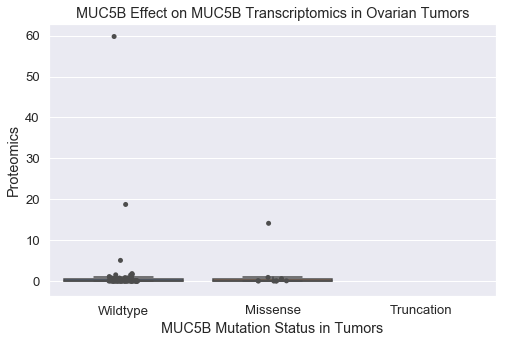

In [10]:
plt.rcParams['figure.figsize']=(8,5)
sns.set(font_scale = 1.2)
trans_cis_boxplot = sns.boxplot(data = trans_mut_and_wildtype, x = 'binary_mutations',
                          y = trans_col, order = ["Wildtype","Missense","Truncation"], showfliers = False)  
trans_cis_boxplot.set_title(gene + " Effect on " + gene +" Transcriptomics in Ovarian Tumors")
trans_cis_boxplot = sns.stripplot(data = trans_mut_and_wildtype, x = 'binary_mutations',y = trans_col, jitter = True, 
                        color = ".3", order = ["Wildtype","Missense","Truncation"])
trans_cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Proteomics")
plt.show()
plt.clf()
plt.close()

# Phosphoproteomics cis comparison

Phosphoproteomics: Mutated and Wildtype

In [34]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
omics_and_mut = ov.join_omics_to_mutations(
    mutations_genes = gene, omics_df_name = 'phosphoproteomics', omics_genes = gene)

# Step 2 - Create the binary column needed to do the comparison
omics_and_mut['binary_mutations'] = omics_and_mut[gene+'_Mutation_Status'].apply(
    lambda x: 'Wildtype' if x == 'Wildtype_Tumor' else 'Mutated')

# Step 3 - Format
omics_and_mut = omics_and_mut.query('Sample_Status != "Normal"') # changed because warning with slice
#tumors = omics_and_mut.loc[omics_and_mut['Sample_Status'] == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
binary_phospho = omics_and_mut.drop(columns_to_drop, axis = 1)
only_phospho = binary_phospho.drop('binary_mutations', axis = 1)

No MUC5B mutated real measurements for phosphoproteomics to do the T-test.

Graph

In [13]:
# Create data frame with all significant phospho sites in order to graph
phospho_list = list(only_phospho.columns)
phospho_df = pd.melt(binary_phospho, id_vars = 'binary_mutations', 
            value_vars = phospho_list, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phospho_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names
#sig_phospho_df.dropna(axis=0)

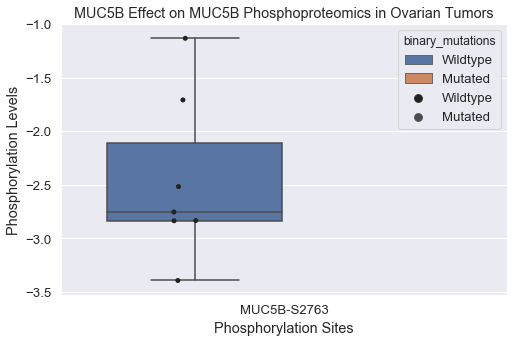

In [31]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1.2)
cis_boxplot = sns.boxplot(data = phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on " + gene + " Phosphoproteomics in Ovarian Tumors")
cis_boxplot = sns.stripplot(data = phospho_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Mutated"], jitter = True, color = ".3", dodge = True)
cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
cis_boxplot.set_xticklabels(cis_boxplot.get_xticklabels())
plt.show()
plt.clf()
plt.close()

Phosphoproteomics: Missense and Truncation

In [15]:
# select all wildtype from earlier -add to mut_type binary column
phos_wildtype = binary_phospho.loc[binary_phospho['binary_mutations'] == 'Wildtype'] 

phos_mut_type = f.get_missense_truncation_comparison(ov, 'phosphoproteomics', gene)
phos_mut_and_wildtype = phos_mut_type.append(phos_wildtype, sort=True) 

Only missence type mutations found for MUC5B. Not possible to compare mutation types.


In [26]:
phos_col_list = list(only_phospho.columns)
# compare missense and wildtype
miss_wt = phos_mut_and_wildtype.loc[phos_mut_and_wildtype['binary_mutations'] != 'Truncation']
print("Doing t-test comparison for missense and wildtype\n")
phos_results_miss = al.wrap_ttest(miss_wt, 'binary_mutations', phos_col_list)
print(phos_results_miss)

# no truncation mutations

Doing t-test comparison for missense and wildtype

No significant comparisons.
None


Graph Missense and Truncation

In [17]:
# Create data frame with all significant phospho sites in order to graph
phos_mut_type_df = pd.melt(phos_mut_and_wildtype, id_vars = 'binary_mutations', 
            value_vars = phos_col_list, var_name = 'specific_phospho', value_name = 'phosphoproteomics')
phos_mut_type_df.replace(to_replace = '_phosphoproteomics', value = '', 
                        inplace = True, regex = True) # shorten column names
#sig_phospho_df.dropna(axis=0)

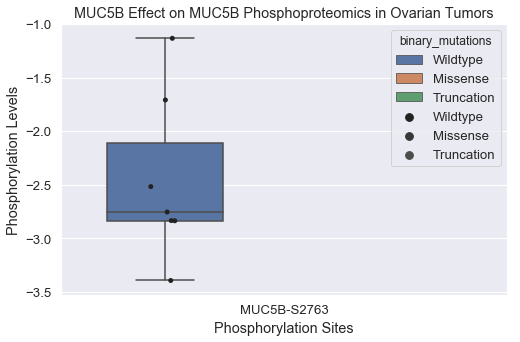

In [38]:
plt.rcParams['figure.figsize']=(8,5) #size of plot
sns.set(font_scale = 1.2)
phos_cis_boxplot = sns.boxplot(data = phos_mut_type_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                             hue_order = ["Wildtype","Missense","Truncation"], showfliers = False)  
phos_cis_boxplot.set_title(gene + " Effect on " + gene + " Phosphoproteomics in Ovarian Tumors")
phos_cis_boxplot = sns.stripplot(data = phos_mut_type_df, x = 'specific_phospho', y = 'phosphoproteomics', hue = 'binary_mutations',
                               hue_order = ["Wildtype","Missense","Truncation"], jitter = True, color = ".3", dodge = True)
phos_cis_boxplot.set(xlabel = 'Phosphorylation Sites', ylabel = "Phosphorylation Levels")
phos_cis_boxplot.set_xticklabels(phos_cis_boxplot.get_xticklabels())
plt.show()
plt.clf()
plt.close()

#  Compare common mutations

Find the common mutation types and compare them to the wildtype tumors.

In [19]:
# Count all mutations (including all mutations in a sample)
somatic_mutations = ov.get_mutations()
gene_mutations = somatic_mutations.loc[somatic_mutations['Gene'] == gene]
count_all_mut = gene_mutations['Mutation'].value_counts()
count_all_mut


Missense_Mutation    11
Silent                3
Name: Mutation, dtype: int64

In [20]:
mut = 'Missense_Mutation'
gene_mutations.loc[gene_mutations['Mutation'] == mut]
#gene_mutations['Location'].value_counts()

,Gene,Mutation,Location
Sample_ID,,,
S013,MUC5B,Missense_Mutation,p.A2618V
S026,MUC5B,Missense_Mutation,p.R3602C
S029,MUC5B,Missense_Mutation,p.D5087N
S043,MUC5B,Missense_Mutation,p.T1947P
S057,MUC5B,Missense_Mutation,p.Q289R
S059,MUC5B,Missense_Mutation,p.S716T
S060,MUC5B,Missense_Mutation,p.T3358P
S080,MUC5B,Missense_Mutation,p.D682N
S080,MUC5B,Missense_Mutation,p.K1068N


# Analysis of Results

MUC5B proteomics increased for the mutated compared to the wildtype tumors. All mutations are missense type mutations. Not enough data for comparison with phosphoproteomics.

No acetylproteomics for the ovarian dataset.